# Unsupervised Learning Exercise Solution

## Practice Exercise for unsupervised learning

<ol>
<li> Consider alcohol, sulphates and pH in wine data and find optimal number of clusters using Kmeans. Visualise the cluster memberships in pairwise plots and explain why do you see overlap.
<br></br>


<li> Figure out why silhoutte score is not a good measure for DBSCAN. See if you can find a good measure for goodness of clusters found through dbscan.
<br></br>

<li> Use dbscan to find out customers which are very different in terms of purchase patterns in the dataset . Consider only and milk and groceries purchase data from dataset 'Wholesale customers data.csv'.
<br></br>

<li>For the case study "cars.csv" taken in the class:<br></br>
    a. Drop the variables for which noice variance is higher than 0.1 when you consider number of factors as 4<br></br>
    b. After dropping find latent factors depending upon the variable loadings in the factor, try to label them.
<ol>

In [1]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

# Q.1

In [2]:
wine=wine[["sulphates","alcohol","pH"]]

wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns))

In [3]:
Ks=np.linspace(2,15,14)

('for inertia:', 3566.2701117029787, 'and silhouette score:', 0.28802399860386768, 'number of clusters are:', 2)
('for inertia:', 2691.6945428842942, 'and silhouette score:', 0.31988782101209229, 'number of clusters are:', 3)
('for inertia:', 2205.679917255959, 'and silhouette score:', 0.2830421876941146, 'number of clusters are:', 4)
('for inertia:', 1866.9446789463266, 'and silhouette score:', 0.27154480858548602, 'number of clusters are:', 5)
('for inertia:', 1661.3436176783575, 'and silhouette score:', 0.27126762895629597, 'number of clusters are:', 6)
('for inertia:', 1500.319265899994, 'and silhouette score:', 0.25006256981382424, 'number of clusters are:', 7)
('for inertia:', 1369.9616469111224, 'and silhouette score:', 0.25894039892351356, 'number of clusters are:', 8)
('for inertia:', 1266.8270657566957, 'and silhouette score:', 0.25503729282227383, 'number of clusters are:', 9)
('for inertia:', 1167.2016464602411, 'and silhouette score:', 0.25698391722812436, 'number of clust

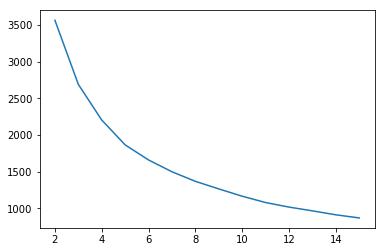

In [4]:
ssw=[]
for k in Ks:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(wine_std)
    sil_score=silhouette_score(wine_std,kmeans.labels_)
    print("for inertia:" ,kmeans.inertia_ ,"and silhouette score:",sil_score,"number of clusters are:", int(k))
    ssw.append(kmeans.inertia_)
plt.plot(Ks,ssw)

In [5]:
# Here selected number of cluster = 6
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = kmeans.labels_
wine_std["cluster"]=labels

In [7]:
from ggplot import *

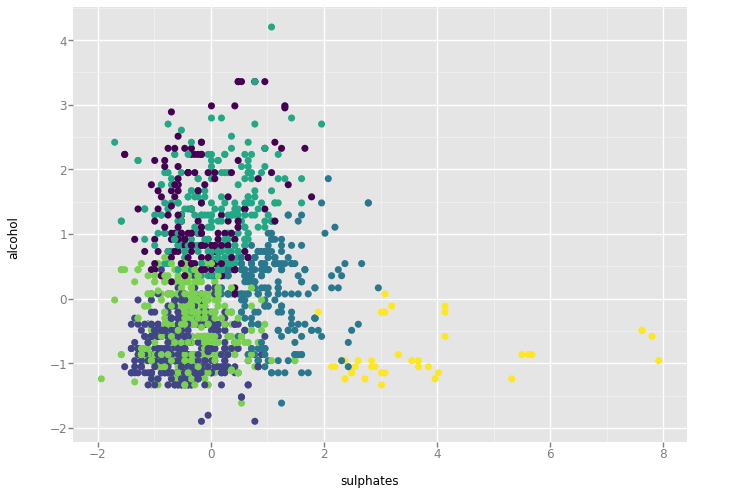

<ggplot: (14669800)>

In [8]:
ggplot(wine_std,aes(x='sulphates',y='alcohol'))+geom_point(aes(color='cluster'),size=50)

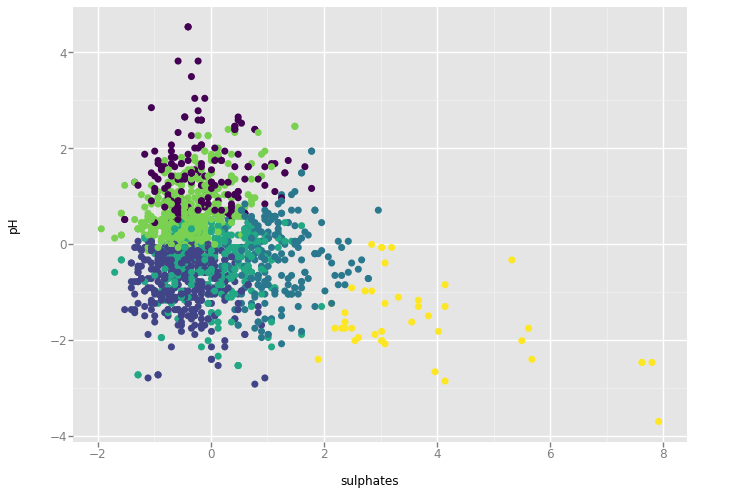

<ggplot: (19016354)>

In [9]:
ggplot(wine_std,aes(x='sulphates',y='pH'))+geom_point(aes(color='cluster'),size=50)

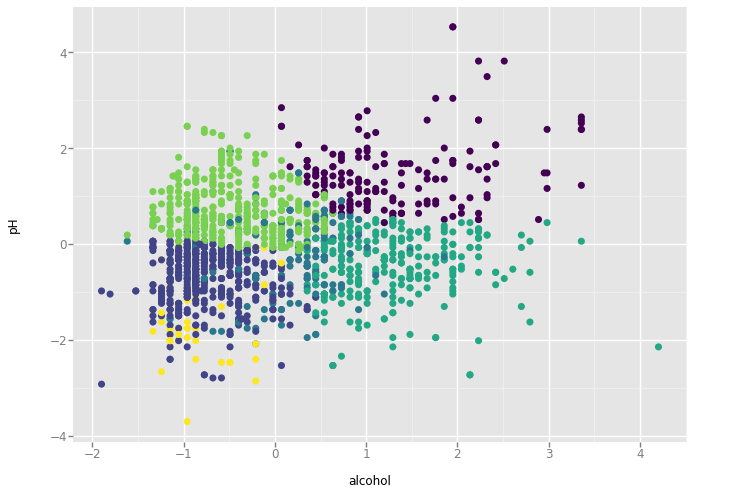

<ggplot: (14525132)>

In [10]:
ggplot(wine_std,aes(x='alcohol',y='pH'))+geom_point(aes(color='cluster'),size=50)

The overlap we see here is not actually an overlap but its a 6 dimensional view in a 2D space. Meaning there are 6 clusters formed in 6D space and when you see them in 2D space its seems to be overlapped but in reality they never overlap.

# Q.2

dbscan doesnt have a good measure and all the internal measures are either suited to k-means or they need labeled data . 
You need to take a subjective decision whther cluster given by dbscan make business sense or not . When you have labeled data however , dbscan can be used to make distance based similarity features and see whether labelling is consistent with the data or not.

# Q.3

In [11]:
myfile='Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

In [12]:
from __future__ import division

In [13]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [14]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
#     core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clust=len(set(labels))-1
    outlier=np.round(np.count_nonzero(labels == -1)/len(labels)*100,2)
        
    print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)
   


('Estimated number of clusters: %d', 1)
('For epsilon =', 0.5, ', percentage of outliers is: ', 9.7699999999999996)
('Estimated number of clusters: %d', 1)
('For epsilon =', 0.59183673469387754, ', percentage of outliers is: ', 7.9500000000000002)
('Estimated number of clusters: %d', 1)
('For epsilon =', 0.68367346938775508, ', percentage of outliers is: ', 6.3600000000000003)
('Estimated number of clusters: %d', 1)
('For epsilon =', 0.77551020408163263, ', percentage of outliers is: ', 5.6799999999999997)
('Estimated number of clusters: %d', 1)
('For epsilon =', 0.86734693877551017, ', percentage of outliers is: ', 4.5499999999999998)
('Estimated number of clusters: %d', 1)
('For epsilon =', 0.95918367346938771, ', percentage of outliers is: ', 4.3200000000000003)
('Estimated number of clusters: %d', 1)
('For epsilon =', 1.0510204081632653, ', percentage of outliers is: ', 3.4100000000000001)
('Estimated number of clusters: %d', 1)
('For epsilon =', 1.1428571428571428, ', percentage o

Choose the epsilon value that gives at aleast 5% customers which are very different in terms of purchase patterns.

In [15]:
db = DBSCAN(eps=2, min_samples=4, metric='euclidean').fit(groc_std)
groc_std['cluster']=[str(x) for x in db.labels_]

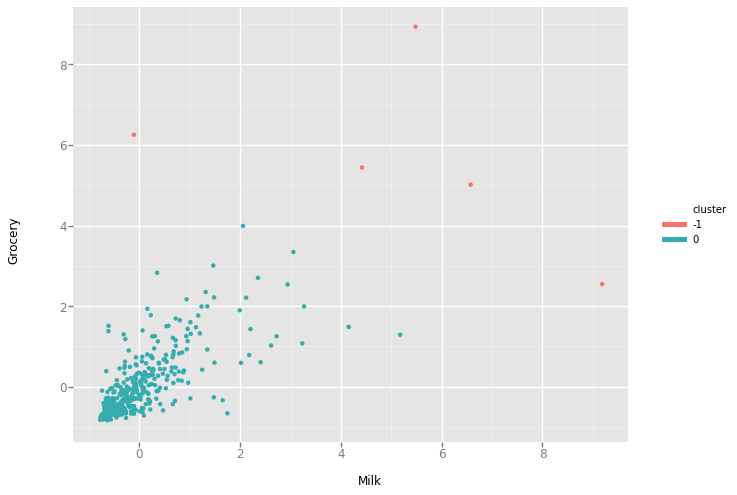

<ggplot: (19330501)>

In [16]:
ggplot(groc_std,aes(x='Milk',y='Grocery',color='cluster'))+geom_point()

# Q.4

In [29]:
from sklearn.decomposition import FactorAnalysis

In [30]:
data_file='cars.csv'
cars=pd.read_csv(data_file)

In [31]:
X_cars=cars.drop(['Name'],1)

In [32]:
X_cars=pd.DataFrame(scale(X_cars),columns=X_cars.columns)

In [33]:
fa=FactorAnalysis(n_components=4,max_iter=1000)

In [34]:
fa.fit(X_cars)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=4,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

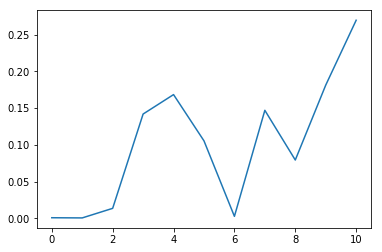

In [35]:
nvar=fa.noise_variance_
plt.plot(nvar)

In [38]:
print(*zip(X_cars.columns),nvar)

SyntaxError: invalid syntax (<ipython-input-38-042f92377982>, line 1)

# a.

We will remove the variables one by one for which noice variance is higher than 0.1

[('Retail', 0.00092218783839759233), ('Dealer', 0.00073160142306938347), ('Engine', 0.013236006965147706), ('Cylinders', 0.14200705158530513), ('Horsepower', 0.16873924675331964), ('CityMPG', 0.106592979079706), ('HighwayMPG', 0.0024756591397855354), ('Weight', 0.15433338694343723), ('Wheelbase', 0.011559690422064617), ('Length', 0.22433952899210663)]


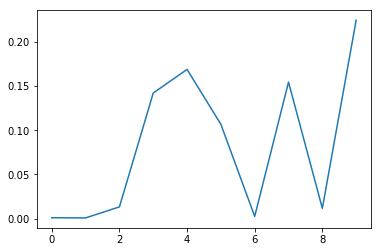

In [39]:
X_cars=X_cars.drop(['Width'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(zip(X_cars.columns,nvar))
plt.plot(nvar)

[('Retail', 0.00075963123878497463), ('Dealer', 0.00094216766178223388), ('Engine', 0.046970569909160154), ('Cylinders', 0.11355862006225226), ('Horsepower', 0.15783629663176857), ('CityMPG', 0.10180836222116785), ('HighwayMPG', 0.0058403558407592593), ('Weight', 0.011066290951327273), ('Wheelbase', 0.33226425103174129)]


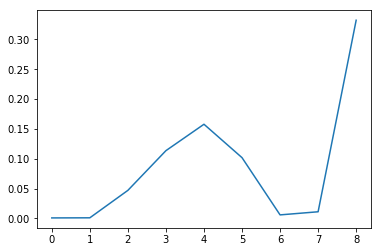

In [40]:
X_cars=X_cars.drop(['Length'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(zip(X_cars.columns,nvar))
plt.plot(nvar)

[('Retail', 0.00086249476225341848), ('Dealer', 0.00083413868418558135), ('Engine', 0.033967518442398092), ('Cylinders', 0.12262570809268047), ('Horsepower', 0.1537303200654484), ('CityMPG', 0.05537187956812506), ('HighwayMPG', 0.045367890917416775), ('Weight', 0.11174916438350968)]


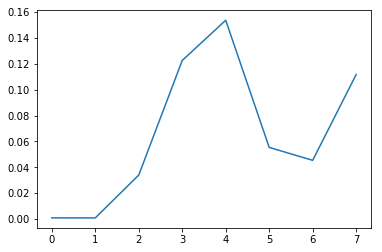

In [41]:
X_cars=X_cars.drop(['Wheelbase'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(zip(X_cars.columns,nvar))
plt.plot(nvar)

[('Retail', 0.00087367006146044091), ('Dealer', 0.00082291098144637864), ('Engine', 0.035711907326811176), ('Cylinders', 0.12114751143324209), ('CityMPG', 0.061331080950745798), ('HighwayMPG', 0.042096789602283913), ('Weight', 0.096323462032828489)]


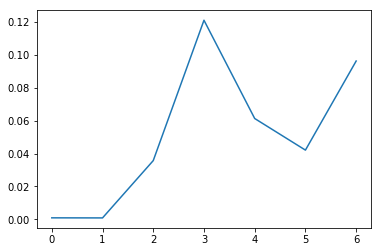

In [42]:
X_cars=X_cars.drop(['Horsepower'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(zip(X_cars.columns,nvar))
plt.plot(nvar)

In [43]:
loadings=fa.components_
loadings

array([[  9.99499162e-01,   9.99440036e-01,   6.06731758e-01,
          6.61338706e-01,  -4.94355116e-01,  -4.78705166e-01,
          4.84661703e-01],
       [  1.12428051e-02,   1.69291057e-02,  -6.69935932e-01,
         -5.63548624e-01,   7.69062291e-01,   7.97164859e-01,
         -7.35436446e-01],
       [  8.24743364e-04,  -3.18324896e-03,   3.81053504e-01,
          3.32548646e-01,   3.02644858e-01,   3.05292536e-01,
          1.08187792e-01],
       [ -3.74432841e-04,   7.48909394e-04,  -4.87100759e-02,
         -1.14441419e-01,   1.05778793e-01,  -9.39018503e-03,
          3.41229923e-01]])

# b.

In [45]:
print(zip(X_cars.columns,loadings[0,]))

[('Retail', 0.99949916228746738), ('Dealer', 0.9994400360993323), ('Engine', 0.60673175759708964), ('Cylinders', 0.66133870573267961), ('CityMPG', -0.49435511576096441), ('HighwayMPG', -0.47870516553279546), ('Weight', 0.48466170341557019)]


Loadings for price variables [Retail & Dealer ] is pretty higher , they are the domninant contributors to these factors. Rest of the variables except mileage ones also contribute positively to this. We can consider this factor to be vehicle's percieved value. Higher mileage indicates towards not so high value vehicle accroding to this value indicator

In [46]:
print(zip(X_cars.columns,loadings[1,]))

[('Retail', 0.011242805069957944), ('Dealer', 0.016929105709320692), ('Engine', -0.66993593204634039), ('Cylinders', -0.5635486243886535), ('CityMPG', 0.76906229113433278), ('HighwayMPG', 0.79716485935998593), ('Weight', -0.73543644592193302)]


Here we can see that more weightage is given to Weight,Engine and Cylinders and the relation is inverse in nature
which tells all these variables tends to lower the mileage of the car. We can label this factor as fuel efficiency

In [47]:
print(zip(X_cars.columns,loadings[2,]))

[('Retail', 0.0008247433635374153), ('Dealer', -0.0031832489554450352), ('Engine', 0.38105350368780316), ('Cylinders', 0.33254864573319581), ('CityMPG', 0.30264485765764909), ('HighwayMPG', 0.30529253624846669), ('Weight', 0.10818779248655958)]


Here we can see that all variables are given the positive weights so we can label this factor as specs.

In [48]:
print(zip(X_cars.columns,loadings[3,]))

[('Retail', -0.00037443284066636482), ('Dealer', 0.00074890939410510269), ('Engine', -0.048710075924602136), ('Cylinders', -0.11444141882261932), ('CityMPG', 0.10577879339533121), ('HighwayMPG', -0.0093901850345683782), ('Weight', 0.34122992306402722)]


Here we can see that more weightage is given CityMPG, Weight and Cylinder. We can label this factor as torque, which is decreases with increase in Cylinders, and increases with increase in mileage and weight.